In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

Primary details of the dataset

In [ ]:
print("Head:\n", df.head())
print("\nInfo:\n", df.info())
print("\nDescribe:\n", df.describe())

Head:
    Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \

dropping the unnecessary columns from the dataset to reduce the complexcity

In [ ]:
df = df.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1)

1. Attrition Rate (Pie Chart)

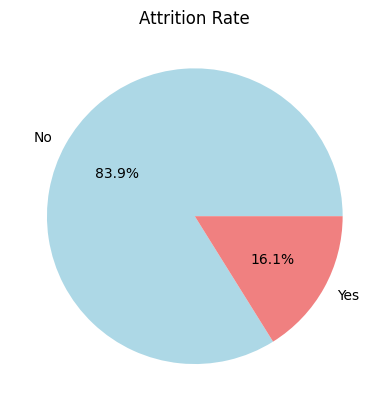

Attrition %:
 Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [ ]:
df['Attrition'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Attrition Rate')
plt.ylabel('')
plt.savefig('attrition_rate.png')
plt.show()
print("Attrition %:\n", df['Attrition'].value_counts(normalize=True) * 100)

MonthlyIncome vs Attrition (Box Plot)

<ipython-input-8-1327c89eb36f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='pastel')


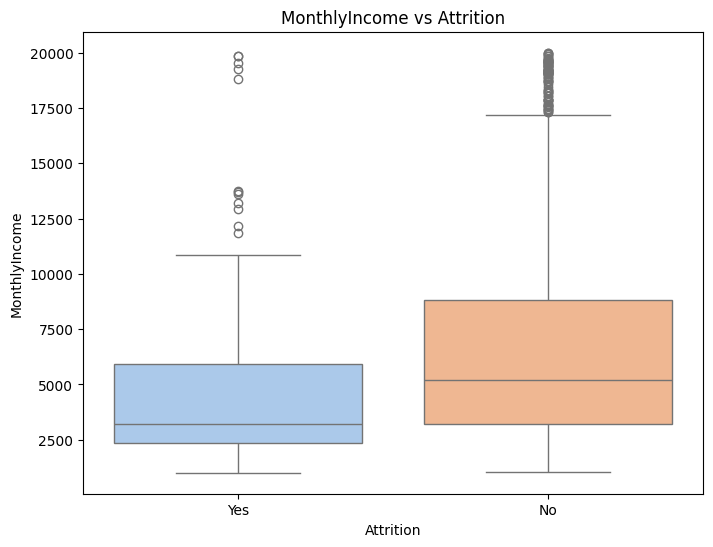

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='pastel')
plt.title('MonthlyIncome vs Attrition')
plt.savefig('salary_attrition.png')
plt.show()

3. Department vs Attrition (Count Plot)

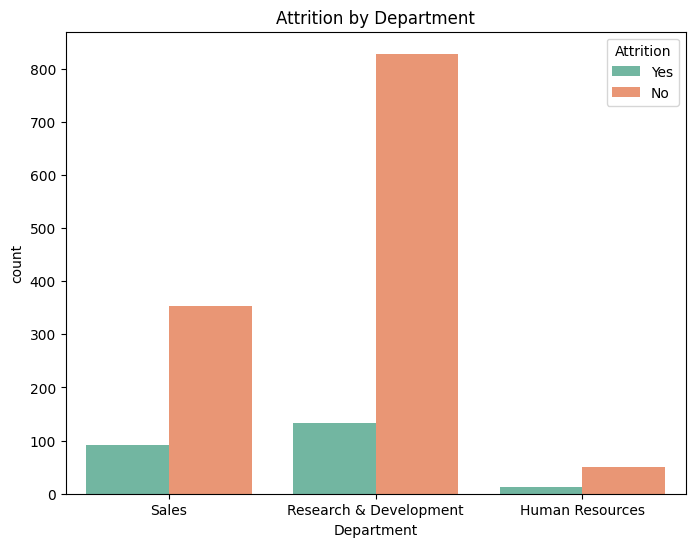

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Department', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition by Department')
plt.savefig('attrition_dept.png')
plt.show()

4. YearsAtCompany vs Attrition (Histogram)

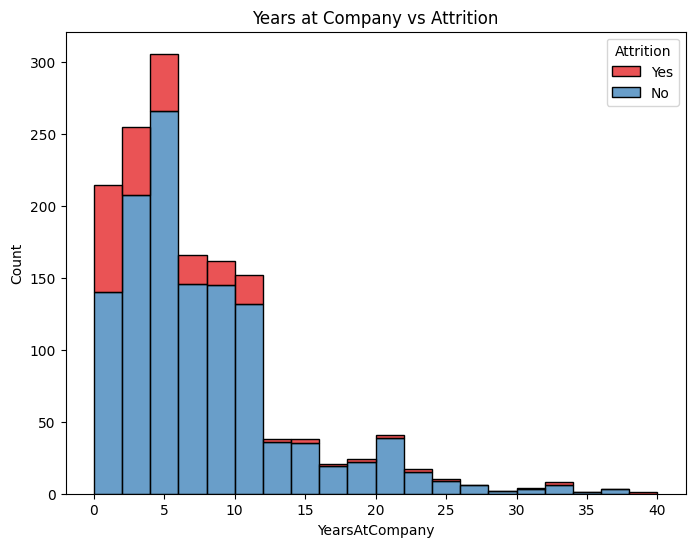

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple='stack', bins=20, palette='Set1')
plt.title('Years at Company vs Attrition')
plt.savefig('years_attrition.png')
plt.show()

5. OverTime vs Attrition (Count Plot)

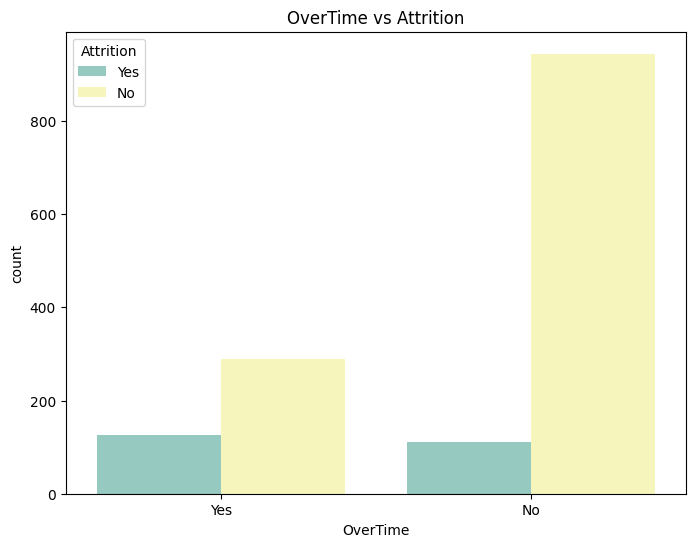

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='Set3')
plt.title('OverTime vs Attrition')
plt.savefig('overtime_attrition.png')
plt.show()

libraries for the ml model

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

making the dataset ready for the model building like splitting the trainign and testing data and removing the dummies and encoding the categorical variables to numerical for model compatability.

In [ ]:
# Encode Attrition (Yes=1, No=0)
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

# Drop irrelevant column
df = df.drop(['EmployeeNumber'], axis=1)

# Encode categorical columns
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                   'JobRole', 'MaritalStatus', 'OverTime']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (1176, 44)
y_train shape: (1176,)


Model building and confusion matrix

Accuracy: 0.8775510204081632


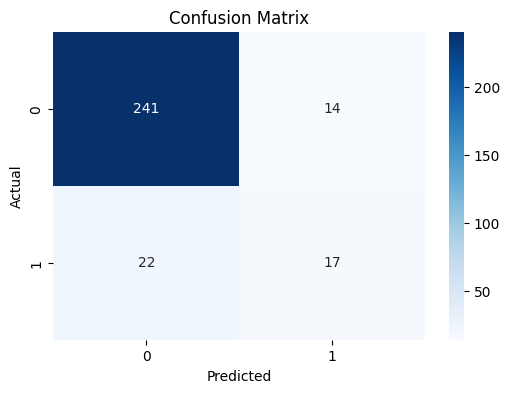

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Train model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.show()

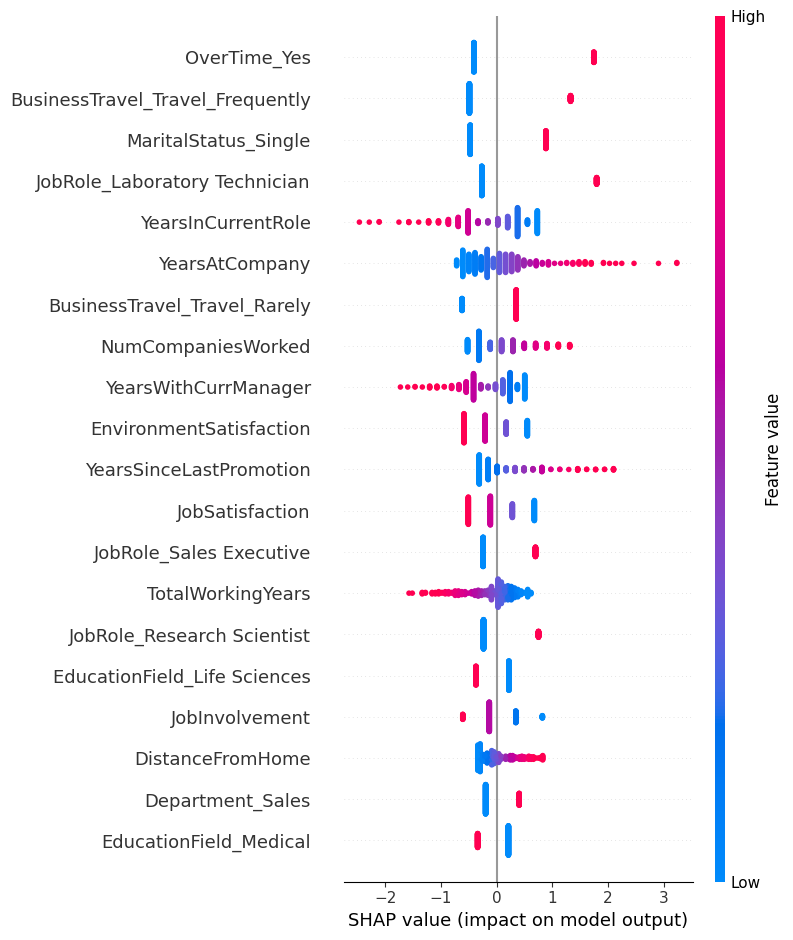

In [ ]:
import shap
import numpy as np

# SHAP explainer
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# Summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=df.drop('Attrition', axis=1).columns, show=False)
plt.savefig('shap_summary.png')
plt.show()